<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.959 · Visualització de dades · PAC3
</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitari en Ciencia de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

**Nom: Víctor Iruela Garrido**

# Pràctica: Creació de la visualització i lliurament del projecte (1a part)
El següent codi ha estat creat i utilitzat per a processar i emmagatzemar diferents sets de dades per a poder fer les respectives representacions.

# 0. Motivació, objectiu

L’objectiu d’aquesta visualització és mostrar l’evolució (1 segle aprox.) de dos cartogramas del món: un amb les temperatures i un altre amb les emissions de CO2 per país, alhora que es recorre una gràfica de la temperatura global, emissions globals i nivell del mar com a referència. Es busca visualitzar de manera ràpida i impactant com estan distribuïdes aquestes emissions i les variacions de temperatura en el món.

Es vol respondre a com afecta la distribució d’emissions de CO2 arreu del planeta i la seva evolució, pel que fa als augments de temperatura de cada país. És a dir, es vol observar com evolucionen les emissions de CO2 en els diferents països i com aquestes poden afectar a l’increment de temperatures del seu propi país o dels altres.

D’aquesta manera, es pretén veure com, malgrat que les emissions de CO2 és una cosa que depèn de cada país, l’augment de temperatures no coneix fronteres.

# 1. Pre-pocessament de les dades

Les dades corresponen a tres sets:

- Les emissions de carboni per país i any, des del 1750 fins al 2020.

- Les temperatures mitjanes per país i mes, des del 1750 fins al 2013.

- El nivell del mar, des del 1993 fins al 2022.

**Font de les dades**
- https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022
- https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv
- https://www.kaggle.com/datasets/kkhandekar/global-sea-level-1993-2021Ç

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
#MODIFICAR D'ACORD A LA RUTA DE LES TEVES CARPETES
#%cd /content/drive/MyDrive/Colab Notebooks/VISUALITZACIO

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Definim una funció que ens servirà per treure els valors únics d'una columna en una llista:

In [3]:
def unique_col_list(df, name_col):
    col_list = df[name_col].to_list()
    return np.unique(col_list)

Carreguem les dades:

In [4]:
df_CO2 = pd.read_csv('CO2 emission by countries.csv').sort_values(by=['Year', 'Country']).reset_index(drop=True)
df_temps = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
# Netejem els mesos que algun valor buit:
df_temps = df_temps.dropna()
df_sea = pd.read_csv('sealevel.csv')

Les explorem:

In [5]:
print(len(unique_col_list(df_temps, 'Country')))
print(len(unique_col_list(df_CO2, 'Country')))

242
220


In [6]:
df_CO2.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%
1,Albania,AL,355,1750,0.0,2842321.0,28748.0,0.00%
2,Algeria,DZ,213,1750,0.0,44903225.0,2381741.0,1.60%
3,Andorra,AD,376,1750,0.0,79824.0,468.0,0.00%
4,Angola,AO,244,1750,0.0,35588987.0,1246700.0,0.80%


In [7]:
df_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [8]:
df_sea.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


Agrupem les dades de temperatures per any i país:

In [9]:
# Primer de tot, insertem una nova columna per l'any i treiem els anys que no ens interessin:
df_temps_dt = df_temps['dt'].to_list()
df_temps.insert(0, "year", [int(item[0:4]) for item in df_temps_dt], True)
df_temps.drop(df_temps[df_temps['year'] < 1750].index, inplace=True)

In [10]:
df_temps = df_temps.groupby(
    ['year', 'Country']).agg(
    {'AverageTemperature': 'mean'}).reset_index()
df_temps.sort_values(by=['year', 'Country']).reset_index(drop=True)
df_temps.rename(columns={'year':'Year'}, inplace=True)
df_temps.head()

,Year,Country,AverageTemperature
0,1750,Albania,13.097909
1,1750,Andorra,11.759364
2,1750,Austria,6.983545
3,1750,Belarus,6.690545
4,1750,Belgium,10.341364


Eliminem les columnes que no necessitem del dataset d'emissions de CO2:

In [11]:
df_CO2 = df_CO2.drop(columns=['Population(2022)', 'Area', '% of World','Code','Calling Code'])
df_CO2 = df_CO2[['Year','Country','CO2 emission (Tons)']]
df_CO2.head()

,Year,Country,CO2 emission (Tons)
0,1750,Afghanistan,0.0
1,1750,Albania,0.0
2,1750,Algeria,0.0
3,1750,Andorra,0.0
4,1750,Angola,0.0


Finalment, juntem les dades en un sol set de dades:

In [12]:
df_final = df_temps.merge(df_CO2, how='left', on=['Year', 'Country']).fillna(0).reset_index(drop=True)
df_final.drop(df_final[df_final['Year'] < 1850].index, inplace=True)
df_final = df_final.reset_index(drop=True)
df_final.to_csv('visualitzacio_practica_final_df.csv') 

In [13]:
df_final.head()

,Year,Country,AverageTemperature,CO2 emission (Tons)
0,1850,Afghanistan,13.326083,0.0
1,1850,Africa,23.672273,0.0
2,1850,Albania,11.734667,0.0
3,1850,Algeria,22.587333,0.0
4,1850,Andorra,10.651750,0.0


Agrupem el set de dades per any, fent la suma d'emissions i la mitjana de temperatures mitjanes per cada any. D'aquesta manera, tenim l'evolució global:

In [14]:
df_final_world = df_final.groupby(
    ['Year']).agg(
    {'CO2 emission (Tons)': 'sum',
     'AverageTemperature': 'mean'}).reset_index()

df_final_world = df_final_world.reset_index(drop=True)
df_final_world.head()

,Year,CO2 emission (Tons),AverageTemperature
0,1850,4.759415e+09,16.907766
1,1851,4.958220e+09,16.761938
2,1852,5.165771e+09,15.926416
3,1853,5.382980e+09,16.140916
4,1854,5.638119e+09,16.255743


In [15]:
def plot_df_cols(df, cols_plot, colors_dict, title, size, ylabel):
    # plot multiple columns such as population and year from dataframe
    plt_show = df.plot(
        x="Year", y=cols_plot,kind="line", figsize=size,
        title = title,
        color=[colors_dict.get(x, '#333333') for x in cols_plot])
    plt_show.legend(fontsize=11, loc="upper left")
    plt_show.set_ylabel(ylabel)
    plt_show.title.set_size(16)

Pintem l'evolució global per a la mitjana de les temperatures i la suma d'emissions per any. Aquests gràfics seran els que utilitzarem a les imatges que compondran el vídeo a la visualització final.

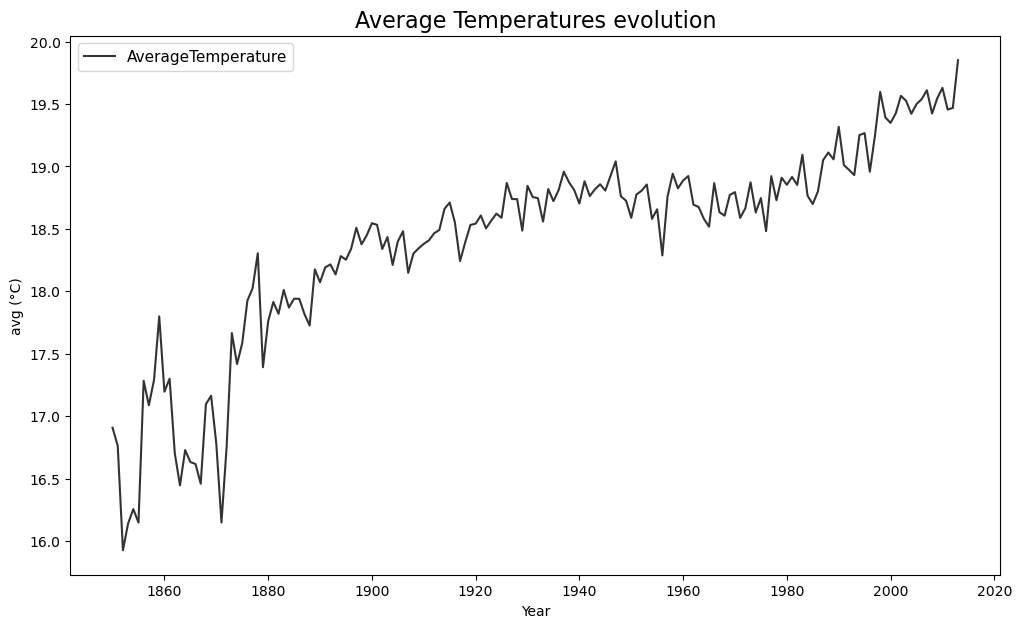

In [16]:
plot_df_cols(df_final_world, ['AverageTemperature'], {}, 'Average Temperatures evolution', (12, 7), 'avg (°C)')

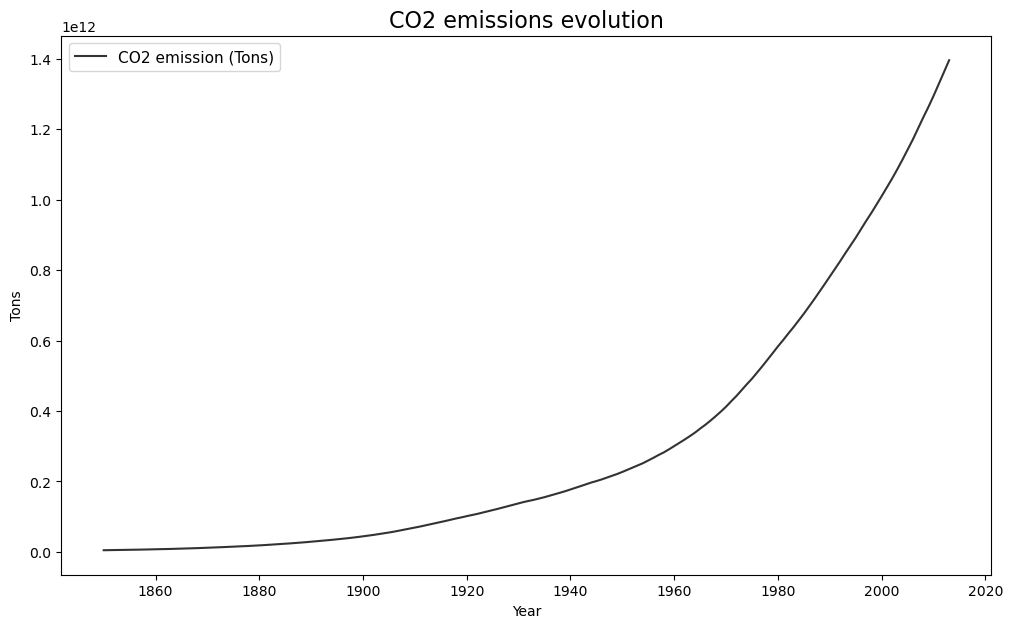

In [17]:
plot_df_cols(df_final_world, ['CO2 emission (Tons)'], {}, 'CO2 emissions evolution', (12, 7), 'Tons')

També pintem l'evolució del nivell del mar. Però aquesta informació no s'utilitzarà, ja que com es pot veure no es tenen dades pel mateix rang de dades que als gràfics anteriors. A més, pràcticament no hi ha evolució, es manté una línia recta sense pendent.

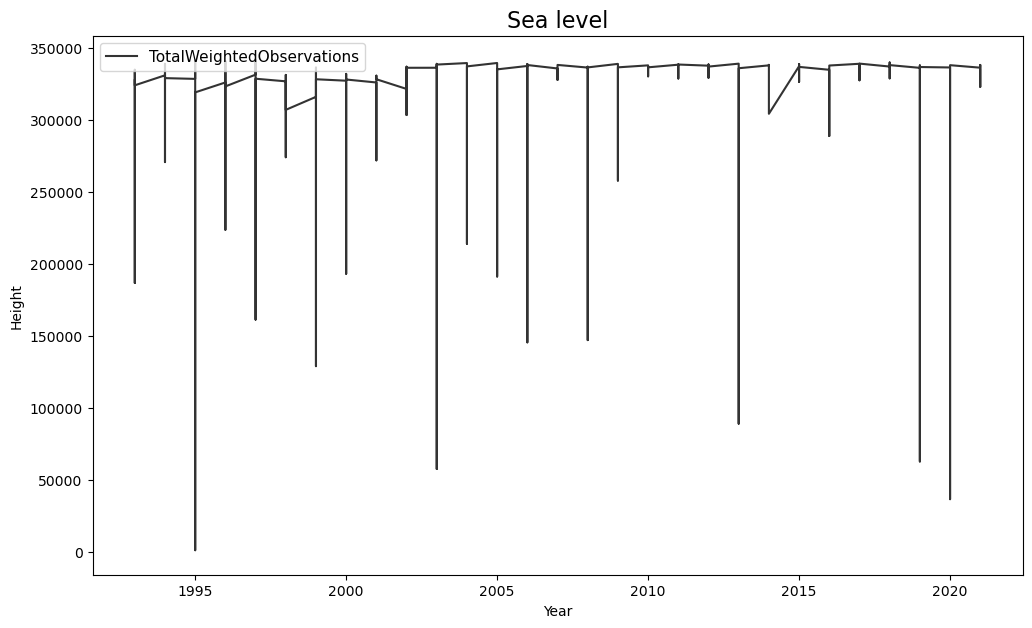

In [18]:
plot_df_cols(df_sea, ['TotalWeightedObservations'], {}, 'Sea level', (12, 7), 'Height')

**NOTA:** Aquest jupyter continua a la segona part. Veure **Practica_Final_2**.